<a href="https://colab.research.google.com/github/AdarshP383/Deep-Learning/blob/main/Regression_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regrssion with Keras

In [ ]:
from warnings import filterwarnings
filterwarnings ('ignore')

# Step 1:Read the Data set

In [ ]:
import pandas as pd
df = pd.read_csv ("https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/main/PowerPlant.csv")
df.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


### Step 2 : Perfom Basic Data Quality Check

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [ ]:
df.isna().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

In [ ]:
df.duplicated().sum()

41

In [ ]:
df.duplicated().sum()/len(df)

0.004285117056856187

In [ ]:
df = df.drop_duplicates(keep='first')
df

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43
...,...,...,...,...,...
9563,15.12,48.92,1011.80,72.93,462.59
9564,33.41,77.95,1010.30,59.72,432.90
9565,15.99,43.34,1014.20,78.66,465.96
9566,17.65,59.87,1018.58,94.65,450.93


### Step 2 : Seperate X and Y (PE)

In [ ]:
x = df.drop(columns=['PE'])
y = df[['PE']]

In [ ]:
x.head()

,AT,V,AP,RH
0,8.34,40.77,1010.84,90.01
1,23.64,58.49,1011.40,74.20
2,29.74,56.90,1007.15,41.91
3,19.07,49.69,1007.22,76.79
4,11.80,40.66,1017.13,97.20


In [ ]:
y.head()

,PE
0,480.48
1,445.75
2,438.76
3,453.09
4,464.43


### Step 4: Preprocess X using pipeline

In [ ]:
x.dtypes

AT    float64
V     float64
AP    float64
RH    float64
dtype: object

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [ ]:
num_pipe = Pipeline(steps=[('impute', SimpleImputer (strategy='mean')),
                           ('sacler', StandardScaler())]).set_output(transform='pandas')

In [ ]:
x_pre = num_pipe.fit_transform(x)
x_pre.head()

,AT,V,AP,RH
0,-1.520448,-1.066041,-0.403535,1.141599
1,0.534897,0.330813,-0.309262,0.059223
2,1.354348,0.205475,-1.024725,-2.151400
3,-0.079020,-0.362884,-1.012941,0.236538
4,-1.055645,-1.074713,0.655349,1.633837


### Apply Train Test split

In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x_pre, y, test_size=0.2, random_state=42)

In [ ]:
xtrain.head()

,AT,V,AP,RH
5703,-0.152905,0.324507,0.089713,1.817999
7322,-1.497611,-1.153542,0.323712,0.908830
9105,-0.885038,-0.954892,0.293410,0.988245
6436,1.398679,1.223949,-0.479290,-1.082031
6790,-0.824586,-0.942279,0.796758,1.506499


In [ ]:
ytrain.head()

,PE
5703,446.68
7322,483.54
9105,461.71
6436,437.38
6790,463.71


In [ ]:
xtest.head()

,AT,V,AP,RH
1087,1.827212,1.120683,-0.125767,-1.414069
6319,-1.501641,-1.244984,0.044260,-0.467246
8052,-1.465370,-1.418408,0.399466,-1.082031
9524,0.150695,0.648495,0.731104,-0.002393
4463,-0.036032,1.128565,-0.361449,1.586599


In [ ]:
ytest.head()

,PE
1087,429.38
6319,485.29
8052,480.40
9524,452.30
4463,446.47


In [ ]:
xtrain.shape

(7621, 4)

In [ ]:
xtest.shape

(1906, 4)

In [ ]:
xtrain.shape[1]

4

### Step 5: Build the neural network


## Hidden Layer use relu as activation function
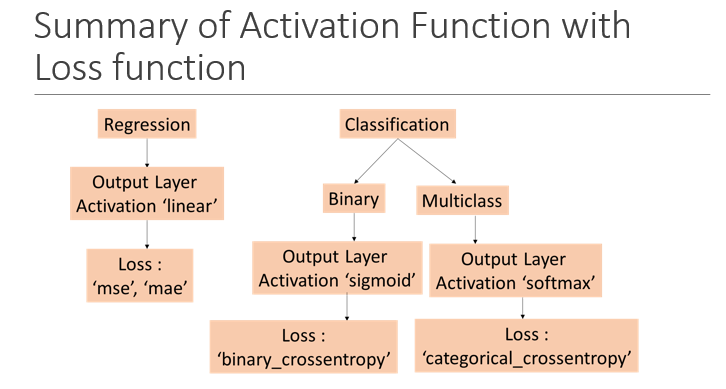

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Input

In [ ]:
# Initilized model
model = Sequential()

# Add Input Layer
model.add(Dense(16, activation='relu'))

# Add Dense Hidden Layer 1
model.add(Dense(16, activation='relu'))

# Add Dense Hidden Layer 2
model.add(Dense(8, activation='relu'))

# Add Output Layer

model.add(Dense(1, activation='relu'))


In [ ]:
# Compile  the Model
model.compile(loss = 'mse', metrics=['mae'], optimizer='adam' )


In [ ]:
hist = model.fit(xtrain, ytrain,
                 validation_data = (xtest,ytest),
                 epochs = 60)

Epoch 1/60
239/239 [==============================] - 5s 5ms/step - loss: 194570.5156 - mae: 440.1875 - val_loss: 141668.5000 - val_mae: 374.8489
Epoch 2/60
239/239 [==============================] - 1s 4ms/step - loss: 46709.4062 - mae: 183.0379 - val_loss: 12751.6748 - val_mae: 93.8502
Epoch 3/60
239/239 [==============================] - 1s 4ms/step - loss: 9299.8574 - mae: 79.8404 - val_loss: 5867.8813 - val_mae: 63.0985
Epoch 4/60
239/239 [==============================] - 1s 4ms/step - loss: 4253.2930 - mae: 53.3559 - val_loss: 2728.2576 - val_mae: 42.3700
Epoch 5/60
239/239 [==============================] - 1s 4ms/step - loss: 2155.7471 - mae: 37.6767 - val_loss: 1535.1266 - val_mae: 31.5633
Epoch 6/60
239/239 [==============================] - 1s 4ms/step - loss: 1304.4904 - mae: 29.0281 - val_loss: 976.2938 - val_mae: 24.8272
Epoch 7/60
239/239 [==============================] - 1s 4ms/step - loss: 858.0678 - mae: 23.1342 - val_loss: 652.2983 - val_mae: 20.0216
Epoch 8/60
239

In [ ]:
hist.history['loss']

[194570.515625,
 46709.40625,
 9299.857421875,
 4253.29296875,
 2155.7470703125,
 1304.4903564453125,
 858.0678100585938,
 571.9055786132812,
 377.1786193847656,
 246.6918182373047,
 162.4549560546875,
 111.5818862915039,
 80.12164306640625,
 60.61900329589844,
 48.70652770996094,
 41.33049011230469,
 36.10661697387695,
 32.43758773803711,
 29.521682739257812,
 27.34998893737793,
 25.54649543762207,
 24.375667572021484,
 23.042787551879883,
 22.464536666870117,
 21.879667282104492,
 21.47309684753418,
 21.22974395751953,
 20.98004913330078,
 20.847820281982422,
 20.77273178100586,
 20.70915985107422,
 20.380455017089844,
 20.390338897705078,
 21.03852653503418,
 20.29693031311035,
 20.405784606933594,
 20.525169372558594,
 20.633541107177734,
 20.38692283630371,
 20.29053497314453,
 20.0472412109375,
 20.13421058654785,
 20.396129608154297,
 20.520374298095703,
 20.118072509765625,
 20.07524299621582,
 20.198219299316406,
 20.940902709960938,
 20.025667190551758,
 20.079204559326172,
 

In [ ]:
hist.history['val_loss']

[141668.5,
 12751.6748046875,
 5867.88134765625,
 2728.257568359375,
 1535.1265869140625,
 976.2938232421875,
 652.2982788085938,
 429.0931701660156,
 281.1028137207031,
 181.6371612548828,
 122.28033447265625,
 89.46039581298828,
 64.84886169433594,
 51.10218811035156,
 42.76177215576172,
 36.78964614868164,
 32.738441467285156,
 29.43790626525879,
 27.767284393310547,
 25.24025535583496,
 23.788143157958984,
 22.81292152404785,
 22.066240310668945,
 21.806079864501953,
 21.216447830200195,
 21.962970733642578,
 20.198514938354492,
 20.471567153930664,
 19.945350646972656,
 20.550539016723633,
 20.734750747680664,
 19.522647857666016,
 21.162965774536133,
 19.379343032836914,
 20.723796844482422,
 19.663509368896484,
 19.496374130249023,
 24.387226104736328,
 19.63271141052246,
 20.341163635253906,
 21.301448822021484,
 19.66781997680664,
 20.567371368408203,
 19.268814086914062,
 19.55906105041504,
 21.686283111572266,
 20.067001342773438,
 19.297130584716797,
 20.517223358154297,
 2

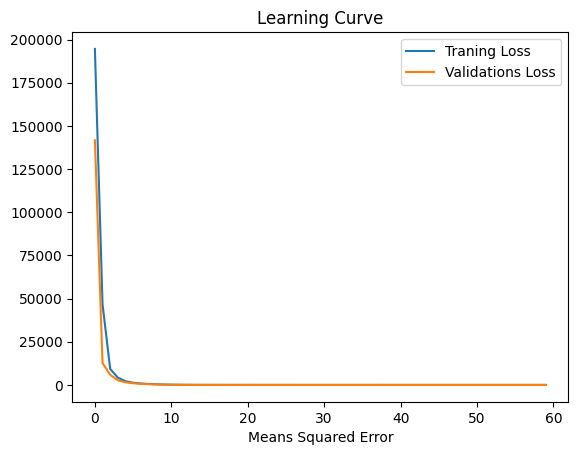

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist.history["loss"], label = "Traning Loss")
plt.plot (hist.history['val_loss'], label ="Validations Loss")
plt.xlabel ('Means Squared Error')
plt.title ("Learning Curve")
plt.legend()
plt.show()

In [ ]:
model.evaluate (xtrain, ytrain)

239/239 [==============================] - 1s 3ms/step - loss: 19.8206 - mae: 3.4704


[19.820629119873047, 3.4703612327575684]

In [ ]:
model.evaluate (xtest, ytest)

60/60 [==============================] - 0s 6ms/step - loss: 19.8453 - mae: 3.5109


[19.8453426361084, 3.5108911991119385]

### Predict the results for train and test


In [51]:
ypred_train = model.predict(xtrain)
ypred_test = model.predict(xtest)

60/60 [==============================] - 0s 2ms/step


In [52]:
ypred_train[0:5]

array([[449.8973 ],
       [477.6575 ],
       [467.61002],
       [432.18533],
       [465.7258 ]], dtype=float32)

In [53]:
ytrain.head()

,PE
5703,446.68
7322,483.54
9105,461.71
6436,437.38
6790,463.71


In [54]:
ypred_test[0:5]

array([[430.06085],
       [481.2147 ],
       [482.84262],
       [449.02   ],
       [445.49173]], dtype=float32)

In [55]:
ytrain.head()

,PE
5703,446.68
7322,483.54
9105,461.71
6436,437.38
6790,463.71


In [56]:
# R2 score in train data
from sklearn.metrics import r2_score
r2_score(ytrain, ypred_train)

0.9310406927205039

In [58]:
# R2 Score for test data
r2_score(ytest, ypred_test)

0.9342411456739974

### Because I have r2 score > 0.8 for both train and test i can use above model for out of sample prediction

In [60]:
url2 = "https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/main/test_PowerPlant.csv"
xnew = pd.read_csv (url2)
xnew.head()

,AT,V,AP,RH
0,22.49,58.82,1009.73,85.19
1,28.88,54.89,1007.16,46.60
2,27.89,73.21,1001.32,85.88
3,25.69,62.26,1011.38,74.08
4,12.16,40.81,1025.79,70.97


In [61]:
num_pipe

Pipeline(steps=[('impute', SimpleImputer()), ('sacler', StandardScaler())])

In [62]:
xnew_pre = num_pipe.transform(xnew)
xnew_pre.head()

,AT,V,AP,RH
0,0.380410,0.356827,-0.590397,0.811615
1,1.238819,0.047028,-1.023041,-1.830315
2,1.105826,1.491180,-2.006171,0.858853
3,0.810286,0.628000,-0.312629,0.051007
4,-1.007284,-1.062888,2.113209,-0.161908


In [63]:
preds = model.predict(xnew_pre)
preds[0:5]

4/4 [==============================] - 0s 3ms/step


array([[443.86115],
       [435.6382 ],
       [430.82272],
       [438.49796],
       [473.76517]], dtype=float32)

In [64]:
xnew["PowerOut_pred"] = preds

In [65]:
xnew

,AT,V,AP,RH,PowerOut_pred
0,22.49,58.82,1009.73,85.19,443.861145
1,28.88,54.89,1007.16,46.60,435.638214
2,27.89,73.21,1001.32,85.88,430.822723
3,25.69,62.26,1011.38,74.08,438.497955
4,12.16,40.81,1025.79,70.97,473.765167
...,...,...,...,...,...
95,26.35,69.48,1008.45,70.47,435.383514
96,11.78,39.96,1011.37,82.95,471.243805
97,5.62,41.38,1020.91,86.21,483.612335
98,24.96,74.99,1008.25,80.52,434.878693


<Axes: xlabel='PowerOut_pred', ylabel='Count'>

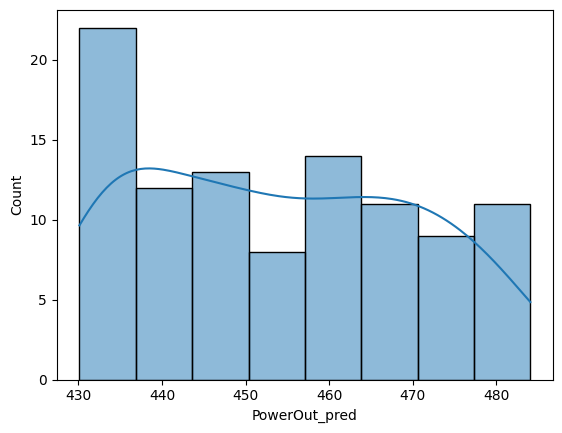

In [66]:
import seaborn as sns
sns.histplot(data=xnew, x="PowerOut_pred", kde = True)

In [67]:
xnew.to_csv("PowerOut_pred.csv", index = False)